

# **Generative Models: The case of GANs (Generative Adversial Networks)**
v.11

---





MSc. Felipe Meza-Obando
fmeza@itcr.ac.cr / fmezacr@gmail.com 



1. Generative Models.
2. Generative Adversial Networks (GANs).
3. Architecture of GANs.
4. Dynamics of GANs.
5. Challenges.
6. The Design of a DCGAN.



### ***1. Generative Models.***

**Problem**: Some applications in AI requiere large amounts of data to reach good accuracy metrics, particularly when images are involved (classification or detection).



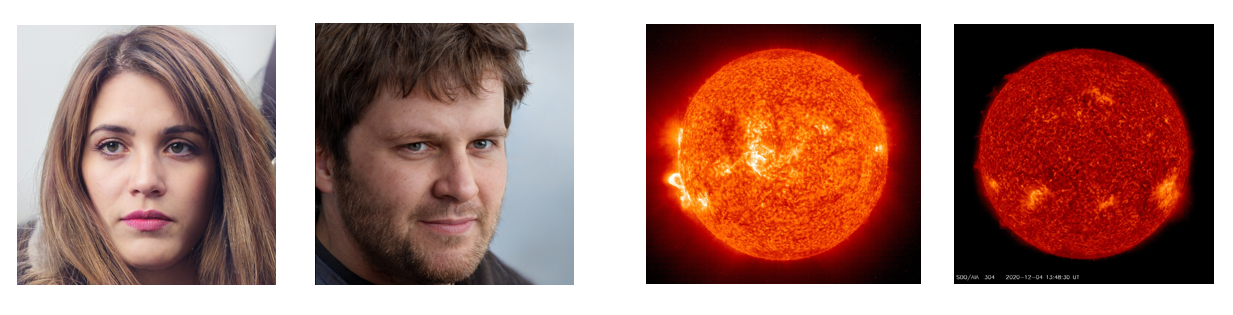


**Solution**: Create synthetic data, to increase the size of our datasets, as a result of that, also increase the accuracy of our classifications or detections.

**Generative Models**: Create new data instances that resemble training data (real data). 



**Generative Models (GM)** are different from **Discriminative Models (DM)**, while GM can generate new data instances, DM discriminate between different kinds of data instances.


Discriminative models try to **draw boundaries** in the data space, while generative models try to model **how data is placed** throughout the space, to produce convincing 1's and 0's by the modeling of the distribution throughout the data space.


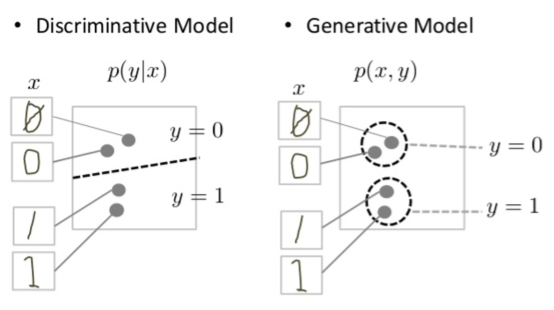

*  A generative model can model a **distribution** by producing convincing "fake" data that looks like it's drawn from that **distribution**.


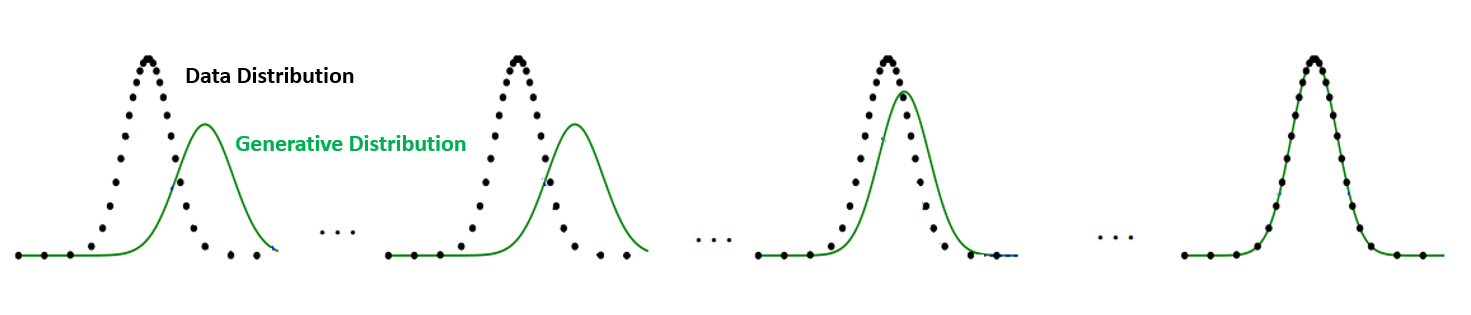

What kind of learning are Generative Models?

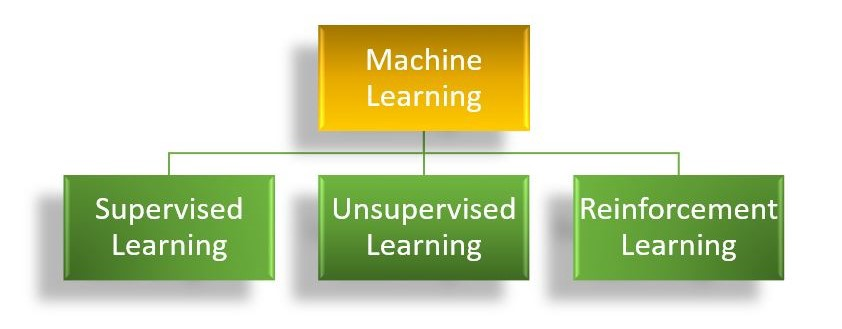

### ***2. Generative Adversial Networks (GANs).***

* GANs are generative models: they create new data instances that resemble your training data. For example, GANs can create images that look like photographs of human faces, even though the faces don't belong to any real person.



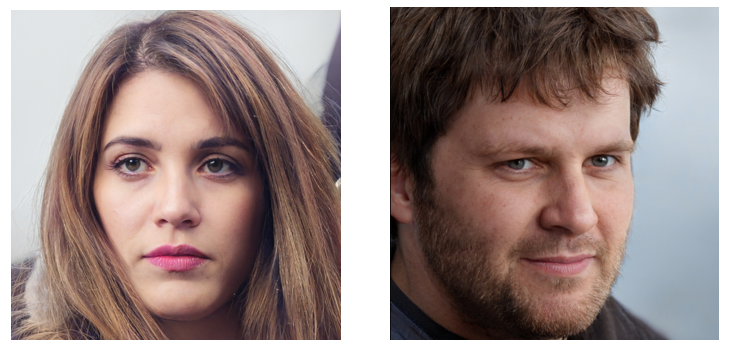


TRY IT! -->  https://thispersondoesnotexist.com/ 

The idea at a very high level is:



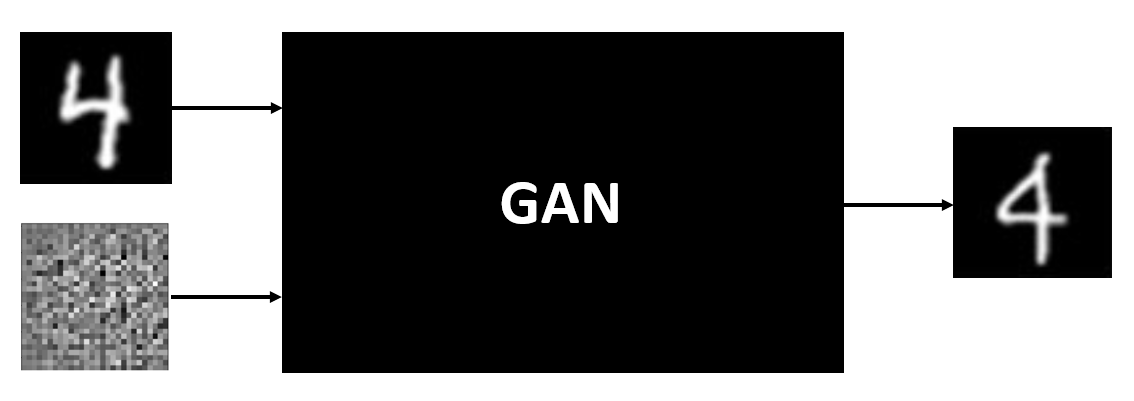

### **3. Architecture of GANs.**

In general terms the GAN has two main blocks:

- The generator learns to generate realistic data from noise.
- The discriminator learns to distinguish the generator's fake data from real data.



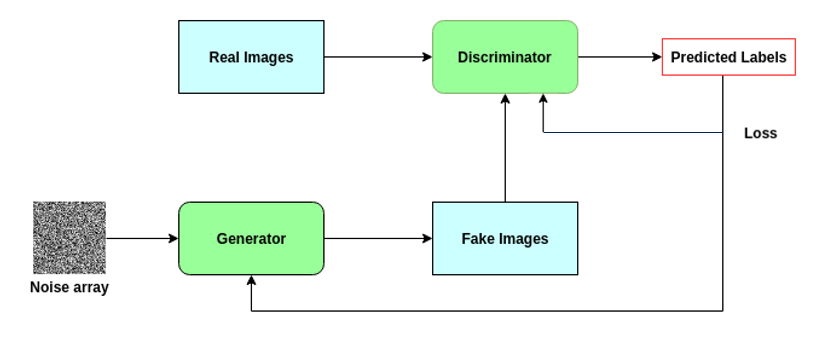

**DISCRIMINATOR**

- The discriminator in a GAN is simply a classifier (e.g CNN). 
- GOAL: It tries to distinguish real data from the data created by the generator. 
- The discriminator's training data comes from two sources: 

  * Real data instances, and uses these instances as positive examples during training.
  * Fake data instances created by the generator, and uses these instances as negative examples during training.

**INDIVIDUAL DISCRIMINATOR TRAINING**

- The discriminator classifies both real data and fake data from the generator.
- The discriminator loss penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real.
- The discriminator updates its parameters through optimization from the discriminator loss.

**GENERATOR**

- The generator learns to create fake data by incorporating feedback from the discriminator (e.g DNN). 
- GOAL: It learns to make the discriminator classify its output as real.

**INDIVIDUAL GENERATOR TRAINING**

- Sample random noise.
- Produce generator output from sampled random noise.
- Get discriminator "Real" or "Fake" classification for generator output.
- Calculate loss from discriminator classification. The generator loss penalizes the generator for failing to fool the discriminator (produce a sample that the discriminator network classifies as fake).
- Use optimization to change only the generator parmeters.



In teh case of DCGAN the **DISCRIMINATOR** is a Convolutional Neural Network and the **GENERATOR** is a De-convolutional Neural Network: 

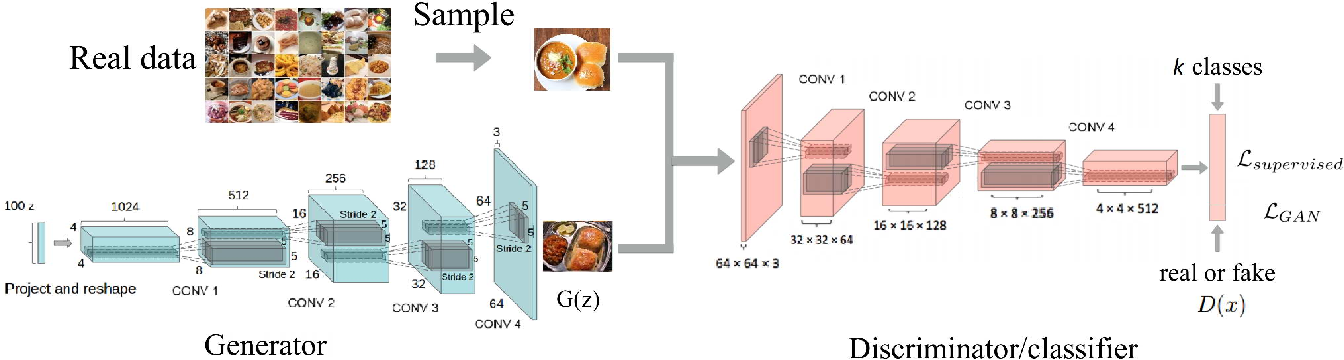

### **4. Dynamics of GANs.**

- Training: alter the parameters (e.g neural net) to reduce the error or loss of its output.

- How do we train the GAN as a whole, condsidering that GANs try to replicate a probability distribution? 
- This question is an area of active research, and many approaches have been proposed. 

**Original Adversial Training Method (minimax)**

- GENERATOR: High loss when create low quality fake data ---> NEEDS TO BE MINIMAL = create the best realistic fake data.
- DISCRIMINATOR: High loss when classify fake data as real ---> NEEDS TO BE MAXIMAL = because of the high quality of data generated.

- Game: The generator tries to fool the discriminator, and the discriminator tries to keep from being fooled.




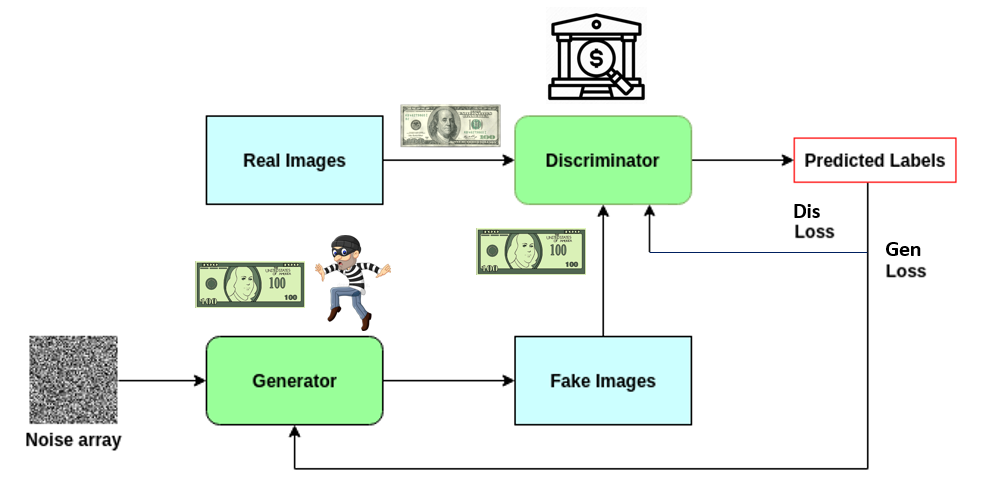



---



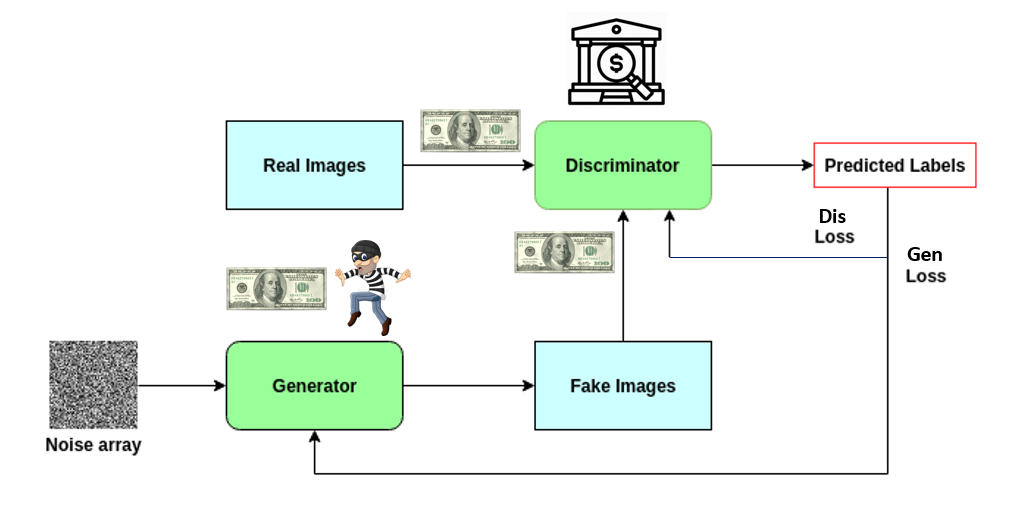

### **5. Challenges of GANs.**

* GM are very complicated distributions, in contrast, a discriminative model might learn the difference between "cat" or "not cat" by just looking for a few patterns. 
* If your discriminator is too good, then generator training can fail due to vanishing gradients. Solution: modifications to minimax fuction.
* Training requieres high computational cost.


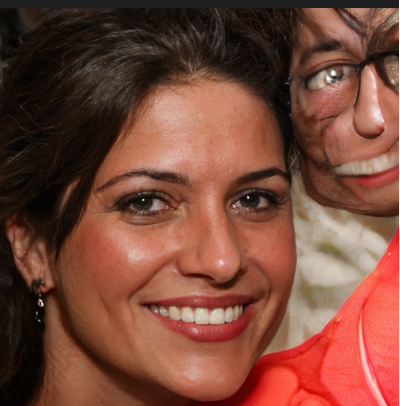


### **6. Design of a DCGAN**

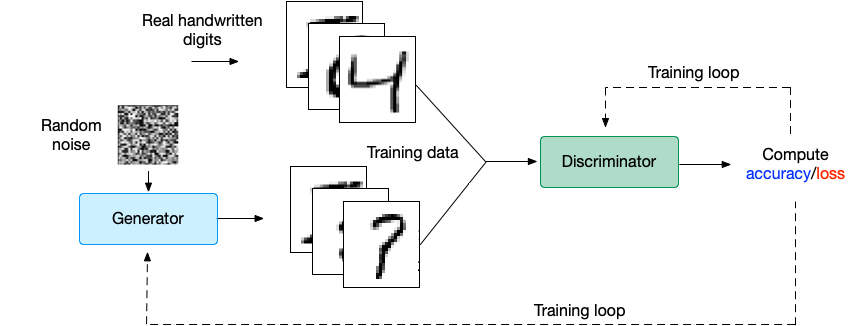

First, we need to import all the required libraries and check the TF version.

In [ ]:
import tensorflow as tf  # TensorFlow is the main lib

In [ ]:
  # TO DO Check the TF version

The following code is important for visualization of the synthetic data, resulting from our GAN.

In [ ]:
# To generate GIFs
# The resulting GIF will show the evolution form noise to the final sythetic (fake) image.
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-o1w_giec
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-o1w_giec
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=184397 sha256=b80a510c8297058cda208164e96a513d6e2c6abf830345bc222e0c3ef948907a
  Stored in directory: /tmp/pip-ephem-wheel-cache-66wduvzj/wheels/cc/c4/d8/5341e93b6376c5c929c49469fce21155eb69cef1a4da4ce32c
Successfully built tensorflow-docs


More libs are need it.

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

MNIST dataset download:

In [ ]:
(train_images, train_labels), (_, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Checking the size of the dataset and max/min values:

In [ ]:
 # TO DO Check the size of the train images

In [ ]:
 # TO DO Check the size of the train labels

In [ ]:
 # TO DO Using numpy check the max and min values of images

In [ ]:
 # TO DO Using numpy check the max and min values of labels

Data Preprocessing, size and normalization of images.

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
  # TO DO Normalize the images to [-1, 1]

In [ ]:
  # TO DO Using numpy check the new max and min values of images 

Why -1 to 1 normalization? What about 0 to 1?

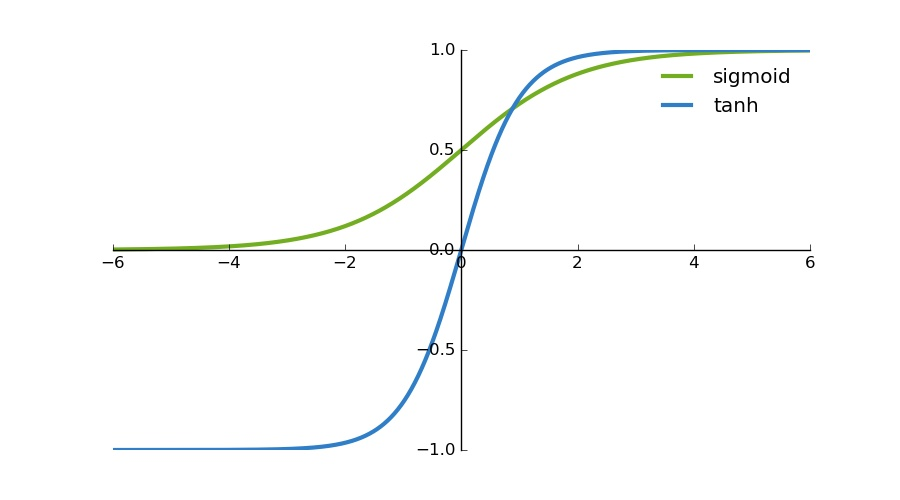

Display an image:

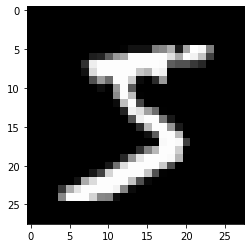

In [ ]:
plt.imshow(train_images[0, :, :, 0], cmap='gray')

Other settings...

In [ ]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [ ]:
# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

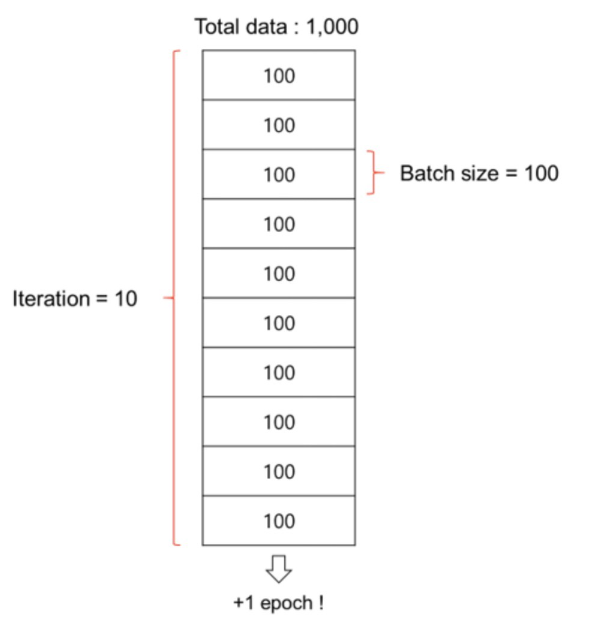

Creation of the **GENERATOR**: 
- The generator produce an image from a random noise. 
- Begins with a Dense layer that takes this random noise as input, then upsample several times until reaching the desired image size of 28x28x1.
- LeakyReLU is the activation function for each layer, except the output layer which uses tanh.

[REMEMBER] CNN parameters

In [ ]:
def make_generator_model():
    model = tf.keras.Sequential() # Sequential groups a linear stack of layers into a Model
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

Add noise data to the GENERATOR input, this noise will be after training, coverted in synthetic "fake" images:

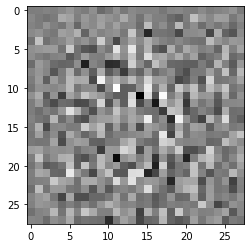

In [ ]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
 # TO DO Display a summary of the Generator

Creation of the DISCRIMINATOR: A CNN-based image classifier.

In [ ]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [ ]:
make_discriminator_model()


The resulting image from the GENERATOR (fake) is the DISCRIMINATOR's input. We use the discriminator not trained yet, to classify the generated images as real or fake. The model will be trained to output positive values for real images, and negative values for fake images.

In [ ]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[-0.00114588]], shape=(1, 1), dtype=float32)


In [ ]:
 # TO DO Display a summary of the Discrminator

Why Leaky ReLU?

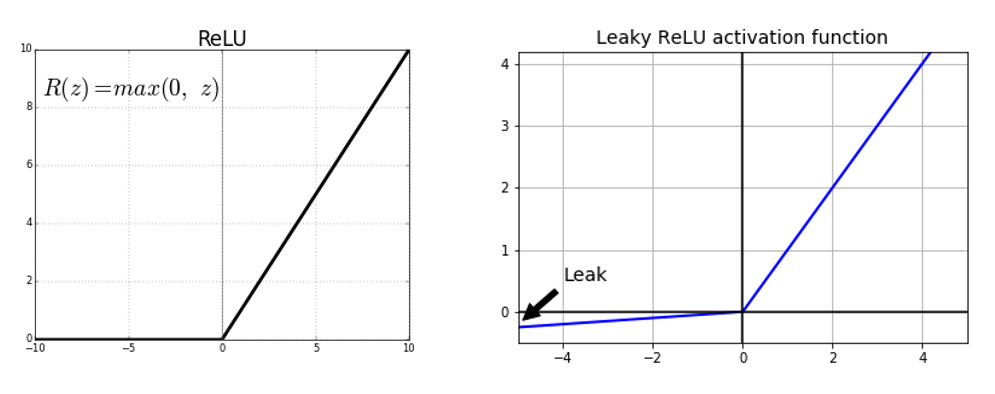

In [ ]:
# This method returns a helper function to compute cross entropy loss

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

DISCRIMINATOR Loss function: 
- This method quantifies how well the discriminator is able to distinguish real images from fakes. 
- It compares the discriminator's predictions on real images to an array of 1s, and the discriminator's predictions on fake (generated) images to an array of 0s.

In [ ]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

GENERATOR Loss function:
- The generator's loss quantifies how well it was able to trick the discriminator. 
- If the generator is performing well, the discriminator will classify the fake images as real (or 1). 
- Here, we compare the discriminators decisions on the generated images to an array of 1s.

In [ ]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

Optimizers for both GENERATOR and DISCRIMINATOR  

In [ ]:
generator_optimizer =   # TO DO set the optimizer for generator using a LR of 1e-4
discriminator_optimizer =    # TO DO set the optimizer for discriminator using a LR of 1e-4

There are several optimizers e.g Gradient Descent, Momentum, Nesterov, Adagrad, Adadelta, RMSProp, Adam, Nadam, etc.

**Adam — Adaptive Moment Estimation**

- Calculates the individual adaptive learning rate for each parameter.
- Reduces diminishing learning rates.
- Computationally efficient and has reduced memory requirement.
- Adam optimizer is one of the most popular gradient descent optimization algorithms.





Checkpoints definitions for long traning periods of time

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

Set the number of epochs:

In [ ]:
EPOCHS = 30
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

The training loop routine:

- Generator receives a random seed as input. 
- That seed is used to produce an image. 
- Discriminator is then used to classify real images (drawn from the training set) and fakes images (produced by the generator). 
- The loss is calculated for each of these models, and the gradients are used to update the generator and discriminator.

In [ ]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled". 
# tf.function: Compiles a function into a callable TensorFlow graph
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 (5?) epochs
    #if (epoch + 1) % 15 == 0:
    if (epoch + 1) % 5 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [ ]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

- The `train()` method is used to train the generator and discriminator simultaneously. 
- It's important that the generator and discriminator do not overpower each other (e.g., that they train at a similar rate).
- The first generated images will look like random noise, but as training progresses, the generated digits will look increasingly real. 
- At the end of training the final images will resemble MNIST digits. 


In [ ]:
!ls {checkpoint_dir}

ls: cannot access './training_checkpoints': No such file or directory


**DO NOT RUN THIS PORTION OF CODE!!.... YET :)**

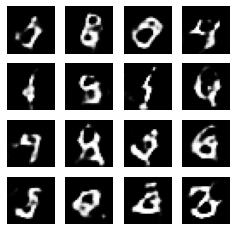

In [ ]:
train(train_dataset, EPOCHS)

In [ ]:
!ls {checkpoint_dir}

checkpoint		    ckpt-4.data-00000-of-00001
ckpt-1.data-00000-of-00001  ckpt-4.index
ckpt-1.index		    ckpt-5.data-00000-of-00001
ckpt-2.data-00000-of-00001  ckpt-5.index
ckpt-2.index		    ckpt-6.data-00000-of-00001
ckpt-3.data-00000-of-00001  ckpt-6.index
ckpt-3.index


In [ ]:
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


In [ ]:
anim_file = 'dcgan.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)


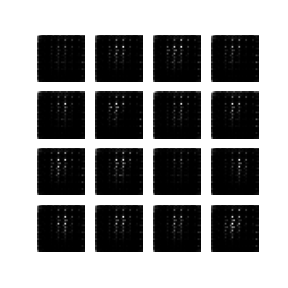

In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

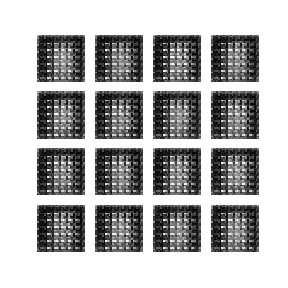

**REFERENCES:**

Generative Adversarial Nets Goodfellow et al, NIPS 2014

Deep Convolutional Generative Adversarial Network - TensorFlow Learn

Keras Documentation

TensorFlow Documentation 

